In [4]:
import pandas as pd
import datetime as dt

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from yaml.loader import SafeLoader
from yaml import load

from transformers import pipeline

In [5]:
posts_df = pd.read_csv('data/ds_ml_ai_reddit_posts.csv')
comments_df = pd.read_csv("data/ds_ml_ai_reddit_comments.csv")


In [6]:
posts_df.head()

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio
0,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7796,186,0.99
1,kuc6tz,MachineLearning,1.610275e+09,NaN,https://v.redd.it/25nxi9ojfha61,[D] A Demo from 1993 of 32-year-old Yann LeCun...,Discussion,5843,133,0.98
2,g7nfvb,MachineLearning,1.587789e+09,NaN,https://v.redd.it/rlmmjm1q5wu41,[R] First Order Motion Model applied to animat...,Research,4763,111,0.97
3,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97
4,ohxnts,MachineLearning,1.625977e+09,NaN,https://i.redd.it/34sgziebfia71.jpg,[D] This AI reveals how much time politicians ...,Discussion,4576,228,0.96


In [7]:
posts_df['created_date'] = posts_df['created_utc'].apply(lambda x: dt.datetime.fromtimestamp(x))
posts_df['created_year'] = posts_df['created_date'].dt.year

In [8]:
posts_df.head()

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year
0,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7796,186,0.99,2020-05-10 10:19:54,2020
1,kuc6tz,MachineLearning,1.610275e+09,NaN,https://v.redd.it/25nxi9ojfha61,[D] A Demo from 1993 of 32-year-old Yann LeCun...,Discussion,5843,133,0.98,2021-01-10 07:30:36,2021
2,g7nfvb,MachineLearning,1.587789e+09,NaN,https://v.redd.it/rlmmjm1q5wu41,[R] First Order Motion Model applied to animat...,Research,4763,111,0.97,2020-04-25 01:27:23,2020
3,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021
4,ohxnts,MachineLearning,1.625977e+09,NaN,https://i.redd.it/34sgziebfia71.jpg,[D] This AI reveals how much time politicians ...,Discussion,4576,228,0.96,2021-07-11 01:18:59,2021


In [9]:
comments_posts_df = posts_df.merge(comments_df, on = 'post_id', how = 'left')

comments_posts_df = comments_posts_df[~comments_posts_df['comment'].isnull()]

## EDA

In [50]:
# Fazer eda depois

## Wordcloud

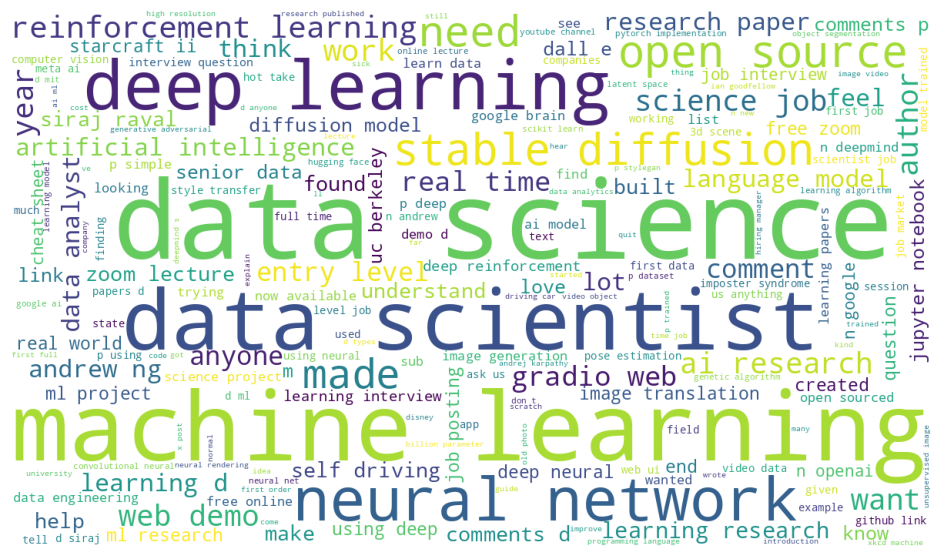

In [10]:
post_title_text = " ".join([title for title in posts_df['post_title'].str.lower()])

word_cloud = WordCloud(collocation_threshold=2, width=1200, height=700,
                       background_color='white').generate(post_title_text)

plt.figure(figsize=(12,7))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [52]:
# Build word cloud by year interactively

## Sentiment analysis

In [11]:
sentiment_classifier = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.

In [64]:
def get_sentiment(text):
    # get sentiment prediciont socres
    try:
        sentiment = sentiment_classifier(text)[0]['label']
    except:
        sentiment = 'Not classified'
    
    return sentiment

In [55]:
comments_posts_df_sub = comments_posts_df[comments_posts_df['post_title'].str.contains('AI')]
comments_posts_df_sub.head()

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment
431,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021,This seems like the next museum gimmick where ...
432,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021,Alan Turing
433,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021,Does that mean we're supposed to find and shar...
434,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021,I used some photos of my father and I'm speech...
435,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021,[cursed_cristiano_ronaldo_statue.mp4](https://...


In [65]:
get_sentiment('I love you')

'POS'

In [66]:
comments_posts_df_sub['sentiment'] = comments_posts_df_sub['comment'].astype(str).apply(lambda x: get_sentiment(x))

/tmp/ipykernel_14358/3455420292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_posts_df_sub['sentiment'] = comments_posts_df_sub['comment'].astype(str).apply(lambda x: get_sentiment(x))


In [68]:
comments_posts_df_sub.sample(5)

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment,sentiment
66290,zfeh67,MachineLearning,1.670449e+09,**EDIT 11:58am PT:** Thanks for all the great ...,https://www.reddit.com/r/MachineLearning/comme...,[D] We're the Meta AI research team behind CIC...,Discussion,655,163,0.93,2022-12-07 18:28:22,2022,Our final agent does not explicitly try to det...,NEG
90735,cgmptl,MachineLearning,1.563849e+09,*Some [commentary](https://threadreaderapp.com...,https://www.reddit.com/r/MachineLearning/comme...,[D] What is OpenAI? I don't know anymore.,Discussion,536,144,0.95,2019-07-22 23:29:08,2019,The guy is superfluous. Just replace him with ...,NEU
59896,10bkjdk,MachineLearning,1.673689e+09,NaN,https://i.redd.it/rg6vkf9xvyba1.png,[N] Class-action law­suit filed against Sta­bi...,News,686,735,0.95,2023-01-14 06:35:51,2023,"True, but that's not because genetic codes are...",Not classified
93625,khin4c,MachineLearning,1.608562e+09,According to [Globe and Mail](https://www.theg...,https://www.reddit.com/r/MachineLearning/comme...,[N] Montreal-based Element AI sold for $230-mi...,News,522,214,0.99,2020-12-21 11:40:21,2020,Consulting/White shoe Law/iBanking/HF/PE/VC - ...,NEU
81545,6t58ks,MachineLearning,1.502497e+09,NaN,https://blog.openai.com/dota-2/,[N] OpenAI bot beat best Dota 2 players in 1v1...,News,564,253,0.96,2017-08-11 21:10:03,2017,This is great. Here are a few more things to c...,Not classified


In [69]:
from lets_plot import *
from lets_plot.mapping import *

In [70]:
LetsPlot.setup_html()

ggplot(comments_posts_df_sub) \
    + geom_pie(aes(fill = as_discrete('sentiment')),
               size = 30, hole = 0.2, stroke = 1.0,
               labels = layer_labels()
                        .line('@sentiment')
                        .line('(@{..prop..})')
                        .format('..prop..', '.0%')) \
    + theme(line = element_blank(),
            axis_text = element_blank(),
            axis_title = element_blank(),
            legend_position = 'none') \
    + ggtitle('Sentiment of around the topic')


In [71]:
comments_posts_df_sub['sentiment'].value_counts()

NEU               9173
NEG               5161
POS               2617
Not classified    2512
Name: sentiment, dtype: int64

## Emotion recognition

In [72]:
emotion_classifier = pipeline('text-classification', model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores = True)

Some layers from the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion and are newly initialized: ['dropout_153']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/naruh

In [73]:
emotion_classifier("Ice cream is delicious")

[[{'label': 'sadness', 'score': 0.0002589895448181778},
  {'label': 'joy', 'score': 0.9985546469688416},
  {'label': 'love', 'score': 0.000635119853541255},
  {'label': 'anger', 'score': 0.00018885225290432572},
  {'label': 'fear', 'score': 0.00014140900748316199},
  {'label': 'surprise', 'score': 0.00022095012536738068}]]

In [76]:
def get_emotion(text):
    try:
        pred_scores = emotion_classifier(text)

        emotion = max(pred_scores[0], key = lambda x: x['score'])['label']
    
    except:
        emotion = 'not defined'

    return emotion

In [77]:
comments_posts_df_sub['emotion'] = comments_posts_df_sub['comment'].astype('str').apply(lambda x: get_emotion(x))

/tmp/ipykernel_14358/3299503040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_posts_df_sub['emotion'] = comments_posts_df_sub['comment'].astype('str').apply(lambda x: get_emotion(x))


In [78]:
comments_posts_df_sub.head()

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment,sentiment,emotion
431,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021,This seems like the next museum gimmick where ...,NEG,joy
432,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021,Alan Turing,NEU,joy
433,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021,Does that mean we're supposed to find and shar...,NEG,anger
434,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021,I used some photos of my father and I'm speech...,POS,sadness
435,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021,[cursed_cristiano_ronaldo_statue.mp4](https://...,NEU,anger


In [79]:
#Fazer analise exploratória desses dados depois

## Building Ask Me Anything chatbot with ChatGPT API

In [116]:
from gpt_index import SimpleDirectoryReader, GPTSimpleVectorIndex, LLMPredictor, PromptHelper, ServiceContext
from langchain.chat_models import ChatOpenAI
import os
from IPython.display import Markdown, display

In [83]:
comments_posts_df_tmp = comments_posts_df[['post_title', 'selftext', 'comment']].astype(str)
agg_comments = comments_posts_df_tmp.groupby(['post_title', 'selftext'])['comment'].apply('. '.join).reset_index()

In [84]:
agg_comments

,post_title,selftext,comment
0,"""Do I need to know {insert advanced math} to g...","These posts occur with some regularity, and {i...",">These posts occur with some regularity, and {..."
1,"""Humans can decipher adversarial images"": A st...",nan,(spends a 100 years teaching computers to thin...
2,"""Hyperparameter Optimisation"" is the ultimate ...",I have found that this term impresses non-tech...,so you work for someone strict enough where yo...
3,"""I'm gonna make him a Neural Network he can't ...",nan,"To visualise 14-dimensional space, first visua..."
4,"""If you torture the data long enough, it will ...",nan,"Just teach me how to torture data like that, s..."
...,...,...,...
1487,£19.91/hr for a PhD Data scientist 😭😂😂,nan,UK moment. This is a strong indicator that the...
1488,“I would like to nominate CNN for the worst da...,nan,I feel like the major news outlets constantly ...
1489,"“If you torture the data long enough, it will ...",nan,From now on I will start each presentation for...
1490,🍪🍪🍪 [OC],nan,r/ComedyCemetery. [deleted]. Correct! And if d...


In [85]:
agg_comments['combined_text'] = agg_comments.astype(str).agg('. '.join, axis=1)
all_text = ' '.join(agg_comments['combined_text'])

In [89]:
with open('textdata/all_text_reddit.txt', 'w') as f:
    f.write(all_text)

In [117]:
# https://www.lennysnewsletter.com/p/i-built-a-lenny-chatbot-using-gpt

def construct_index(directory_path):
    # set max input size
    max_input_size = 4096

    # set number of output tokens
    num_outputs = 256

    # set maximum chunk overlap
    max_chunk_overlap = 20

    #set chunk size limit
    chunk_size_limit = 600

    # define LLM (ChatGPT gpt-3.5-turbo)
    llm_predictor = LLMPredictor(llm = ChatOpenAI(temperature=0, model_name='gpt-3.5-turbo', max_tokens=num_outputs))
    prompt_helper = PromptHelper(max_input_size, num_outputs, max_chunk_overlap, chunk_size_limit=chunk_size_limit)

    documents = SimpleDirectoryReader(directory_path).load_data()

    index = GPTSimpleVectorIndex(
        documents, llm_predictor = llm_predictor, prompt_helper = prompt_helper
    )

    index.save_to_disk('index.json')

    return index

In [118]:
def ask_me_anythink(question):

    index = GPTSimpleVectorIndex.load_from_disk('index.json')
    response = index.query(question, response_mode = 'compact')

    display(Markdown(f"You asked: <b>{question}</b>"))
    display(Markdown(f"Bot says: <b>{response.response}</b>"))

In [95]:
with open('config.yaml') as f:
    config = load(f, SafeLoader)

In [98]:
os.environ['OPENAI_API_KEY'] = config['openai']['api_key']

In [119]:
construct_index('/textdata')

TypeError: BaseGPTIndex.__init__() got an unexpected keyword argument 'llm_predictor'

In [105]:
os.getcwd()

'/mnt/c/Users/Naruhiko/OneDrive/Documentos/Programação/reddit-chatgpt-bot'